# ใครแข็งแกร่งกว่าตลาด
- ใครแกร่งสุดใน SET100 เมื่อเทียบกับ SET

In [75]:
from tvDatafeed import TvDatafeed, Interval
import pandas as pd
import numpy as np
from datetime import datetime as dt


%matplotlib inline
%config InlineBackend.figure_format='retina'

import starfishX as sx

In [2]:
tv = TvDatafeed()

you are using nologin method, data you access may be limited


In [30]:
def days_between(d1, d2):
    d1 = dt.strptime(d1, "%Y-%m-%d")
    d2 = dt.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

def getHistPrice(symbol,start,stop='',exchange='set'):
    
    date_now = dt.today().strftime("%Y-%m-%d") 
    
    if(stop==''):
        stop = date_now
    
    k = days_between(start, date_now)
    
    df = tv.get_hist(symbol=symbol,exchange=exchange,interval=Interval.in_daily,n_bars=k)
    df['Date'] = pd.to_datetime(df.index)
    df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
    df['Date'] = pd.to_datetime(df['Date'])

    df = df[['Date','close']]
    df = df.set_index('Date')
    df.columns = [symbol]
    
    df = df[(df.index>=start) & (df.index<=stop)]
    return df

#####  ตัวอย่าง getHistPrice สำหรับดึงราคาหุ้นและดัชนี

In [177]:
df = getHistPrice(symbol='set',start='2022-01-01')
df.tail(1)

set
Date               
2022-02-04  1674.22

In [179]:
df.head(1)

set
Date               
2022-01-04  1670.28

<AxesSubplot:xlabel='Date'>

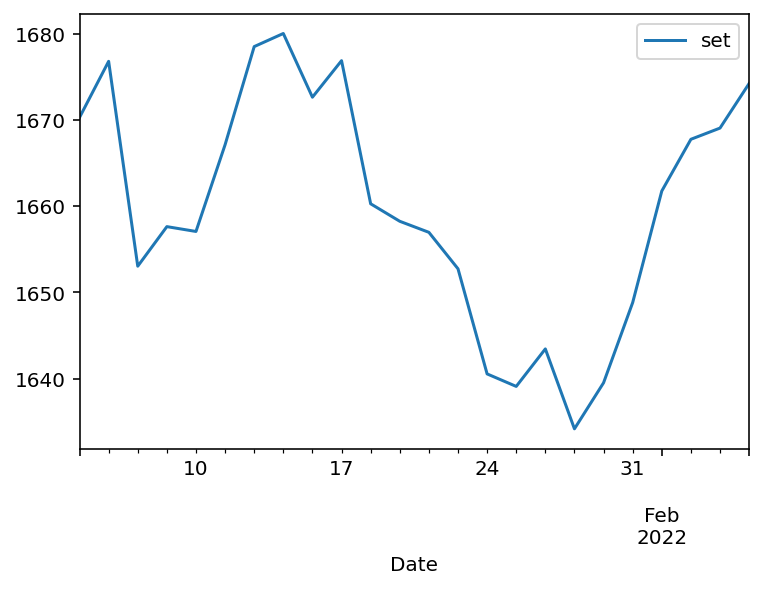

In [178]:
df.plot()

In [181]:
#ตรวจคำตอบ
#ตลาดปรับตัวดีขึ้นมา 0.23%
((1674.22/1670.28)-1)*100

0.23588859352923208

In [191]:
#ดึงข้อมูลสมาชิกใน SET100
basket = sx.getMemberOfIndex(sx.indexMarket.SET100)

In [192]:
#ใช้มาตรฐานตัววัดคือ SET Index
SET = pd.DataFrame({'symbol':'SET'},index=[0])

In [193]:
basket = basket.append(SET,ignore_index=True)

In [194]:
p = 0
for i in basket.symbol:
 if(p==0):
    df = getHistPrice(i,start='2022-01-01')
    p=1
 else:
    k = getHistPrice(i,start='2022-01-01')
    df[i] = k
    
 print(i,end=',')   

ACE,ADVANC,AEONTS,AMATA,AOT,AP,AWC,BAM,BANPU,BBL,BCH,BCP,BCPG,BDMS,BEC,BEM,BGRIM,BH,BLA,BPP,BTS,CBG,CENTEL,CHG,CK,CKP,COM7,CPALL,CPF,CPN,CRC,DOHOME,DTAC,EA,EGCO,EPG,ESSO,GLOBAL,GPSC,GULF,GUNKUL,HANA,HMPRO,INTUCH,IRPC,IVL,JMART,JMT,KBANK,KCE,KEX,KKP,KTB,KTC,LH,MAJOR,MEGA,MINT,MTC,OR,ORI,OSP,PLANB,PTG,PTT,PTTEP,PTTGC,QH,RATCH,RBF,RCL,RS,SAWAD,SCB,SCC,SCGP,SINGER,SIRI,SPALI,SPRC,STA,STARK,STEC,STGT,SUPER,SYNEX,TASCO,TCAP,THANI,TIDLOR,TISCO,TOP,TQM,TRUE,TTA,TTB,TU,TVO,VGI,WHA,SET,

In [195]:
df = np.round(df,2)

In [196]:
#ราคาหุ้นของแต่ละตัว
df

ACE  ADVANC  AEONTS  AMATA    AOT     AP   AWC   BAM  BANPU  \
Date                                                                       
2022-01-04  3.52   228.0   189.0   21.1  61.75   9.55  4.82  21.5   10.6   
2022-01-05  3.56   226.0   191.5   20.9  61.75   9.55  4.76  21.7   10.9   
2022-01-06  3.50   221.0   189.5   20.8  60.50   9.45  4.56  21.2   11.0   
2022-01-07  3.48   221.0   189.0   20.5  61.25   9.65  4.54  21.0   11.2   
2022-01-10  3.42   219.0   191.0   20.5  60.75   9.70  4.48  20.6   11.2   
2022-01-11  3.36   224.0   187.5   20.1  60.25   9.40  4.50  20.5   11.2   
2022-01-12  3.38   222.0   187.5   20.3  60.50   9.50  4.58  20.9   11.2   
2022-01-13  3.36   220.0   188.0   21.1  60.75   9.55  4.62  20.7   11.2   
2022-01-14  3.40   220.0   187.5   20.9  60.50   9.55  4.56  20.6   11.2   
2022-01-17  3.36   218.0   186.0   20.7  61.50   9.50  4.60  20.4   11.2   
2022-01-18  3.28   222.0   185.5   20.8  61.25   9.50  4.58  20.2   10.9   
2022-01-19  3.22   222.0   182.0   20.6  61.25   9.50  4.62  20.1   10.9   
2022-01-20  3.24   221.0   183.0   21.0  62.50   9.40  4.68  19.8   10.9   
2022-01-21  3.24   222.0   182.5   21.6  63.00   9.35  4.70  20.2   10.8   
2022-01-24  3.16   223.0   179.0   21.3  62.00   9.25  4.68  19.9   10.8   
2022-01-25  3.06   222.0   181.5   21.2  62.00   9.45  4.72  19.8   10.6   
2022-01-26  3.08   221.0   184.5   21.3  62.75   9.65  4.76  20.1   10.7   
2022-01-27  3.26   224.0   182.5   21.4  63.00  10.10  4.76  20.0   10.7   
2022-01-28  3.26   222.0   182.0   21.3  64.00  10.00  4.76  20.4   10.7   
2022-01-31  3.26   220.0   183.0   21.4  63.75  10.20  4.90  20.4   11.1   
2022-02-01  3.38   221.0   183.0   21.8  64.25  10.20  4.88  20.8   11.0   
2022-02-02  3.36   223.0   189.5   21.8  64.00  10.30  4.88  21.4   10.9   
2022-02-03  3.32   223.0   191.0   21.7  64.00  10.10  4.90  21.2   10.8   
2022-02-04  3.32   220.0   190.0   21.7  64.25  10.30  4.86  21.2   10.9   

              BBL  ...    TOP    TQM  TRUE    TTA   TTB    TU    TVO   VGI  \
Date               ...                                                       
2022-01-04  125.0  ...  50.00  47.62  4.72  10.10  1.47  19.8  31.00  6.60   
2022-01-05  126.5  ...  52.00  47.50  4.70  10.10  1.45  20.1  31.00  6.65   
2022-01-06  124.0  ...  51.50  46.88  4.64   9.90  1.41  20.5  31.00  6.50   
2022-01-07  124.5  ...  52.25  47.00  4.62  10.10  1.45  20.5  31.25  6.55   
2022-01-10  126.0  ...  52.00  46.88  4.58  10.50  1.44  20.7  31.75  6.50   
2022-01-11  126.5  ...  52.00  46.75  4.68  10.30  1.44  20.7  31.75  6.50   
2022-01-12  127.0  ...  52.75  49.00  4.68  10.20  1.45  20.7  31.75  6.70   
2022-01-13  129.0  ...  52.25  49.00  4.64  10.40  1.46  20.3  32.00  6.70   
2022-01-14  129.0  ...  52.25  48.25  4.68   9.95  1.44  20.2  31.75  6.60   
2022-01-17  129.5  ...  52.25  48.50  4.64   9.55  1.46  20.3  31.75  6.60   
2022-01-18  131.0  ...  51.75  47.25  4.62   9.45  1.44  19.7  31.75  6.50   
2022-01-19  130.0  ...  52.50  47.00  4.88   9.20  1.42  19.5  31.75  6.40   
2022-01-20  132.0  ...  53.50  47.75  4.74   9.15  1.42  19.4  31.50  6.45   
2022-01-21  130.0  ...  52.50  47.50  4.76   9.05  1.39  19.6  31.75  6.30   
2022-01-24  129.5  ...  51.75  46.75  4.78   8.65  1.35  20.2  31.50  6.05   
2022-01-25  133.5  ...  50.75  47.50  4.84   8.70  1.37  20.4  31.50  6.10   
2022-01-26  136.0  ...  52.50  46.50  4.82   8.70  1.37  20.4  31.50  5.55   
2022-01-27  136.0  ...  52.50  45.25  5.00   8.55  1.37  20.6  31.50  5.55   
2022-01-28  135.0  ...  52.50  46.00  4.94   8.75  1.36  21.1  31.25  5.50   
2022-01-31  135.0  ...  52.50  48.25  4.82   9.25  1.36  20.9  31.75  5.50   
2022-02-01  136.0  ...  52.75  47.50  4.84   9.35  1.36  20.7  31.25  5.60   
2022-02-02  136.0  ...  52.00  47.00  4.90   9.40  1.39  20.5  31.75  5.60   
2022-02-03  136.5  ...  51.75  46.75  4.88   9.65  1.34  21.0  31.50  5.75   
2022-02-04  139.0  ...  53.75  46.75  4.88   9.50  1.34  21.0  31.50  5.95   

       

# ปรับราคาให้เริ่มจากฐาน 100

In [197]:
df.rebase(100)

ACE      ADVANC      AEONTS       AMATA         AOT  \
Date                                                                     
2022-01-04  100.000000  100.000000  100.000000  100.000000  100.000000   
2022-01-05  101.136364   99.122807  101.322751   99.052133  100.000000   
2022-01-06   99.431818   96.929825  100.264550   98.578199   97.975709   
2022-01-07   98.863636   96.929825  100.000000   97.156398   99.190283   
2022-01-10   97.159091   96.052632  101.058201   97.156398   98.380567   
2022-01-11   95.454545   98.245614   99.206349   95.260664   97.570850   
2022-01-12   96.022727   97.368421   99.206349   96.208531   97.975709   
2022-01-13   95.454545   96.491228   99.470899  100.000000   98.380567   
2022-01-14   96.590909   96.491228   99.206349   99.052133   97.975709   
2022-01-17   95.454545   95.614035   98.412698   98.104265   99.595142   
2022-01-18   93.181818   97.368421   98.148148   98.578199   99.190283   
2022-01-19   91.477273   97.368421   96.296296   97.630332   99.190283   
2022-01-20   92.045455   96.929825   96.825397   99.526066  101.214575   
2022-01-21   92.045455   97.368421   96.560847  102.369668  102.024291   
2022-01-24   89.772727   97.807018   94.708995  100.947867  100.404858   
2022-01-25   86.931818   97.368421   96.031746  100.473934  100.404858   
2022-01-26   87.500000   96.929825   97.619048  100.947867  101.619433   
2022-01-27   92.613636   98.245614   96.560847  101.421801  102.024291   
2022-01-28   92.613636   97.368421   96.296296  100.947867  103.643725   
2022-01-31   92.613636   96.491228   96.825397  101.421801  103.238866   
2022-02-01   96.022727   96.929825   96.825397  103.317536  104.048583   
2022-02-02   95.454545   97.807018  100.264550  103.317536  103.643725   
2022-02-03   94.318182   97.807018  101.058201  102.843602  103.643725   
2022-02-04   94.318182   96.491228  100.529101  102.843602  104.048583   

                    AP         AWC         BAM       BANPU    BBL  ...    TOP  \
Date                                                               ...          
2022-01-04  100.000000  100.000000  100.000000  100.000000  100.0  ...  100.0   
2022-01-05  100.000000   98.755187  100.930233  102.830189  101.2  ...  104.0   
2022-01-06   98.952880   94.605809   98.604651  103.773585   99.2  ...  103.0   
2022-01-07  101.047120   94.190871   97.674419  105.660377   99.6  ...  104.5   
2022-01-10  101.570681   92.946058   95.813953  105.660377  100.8  ...  104.0   
2022-01-11   98.429319   93.360996   95.348837  105.660377  101.2  ...  104.0   
2022-01-12   99.476440   95.020747   97.209302  105.660377  101.6  ...  105.5   
2022-01-13  100.000000   95.850622   96.279070  105.660377  103.2  ...  104.5   
2022-01-14  100.000000   94.605809   95.813953  105.660377  103.2  ...  104.5   
2022-01-17   99.476440   95.435685   94.883721  105.660377  103.6  ...  104.5   
2022-01-18   99.476440   95.020747   93.953488  102.830189  104.8  ...  103.5   
2022-01-19   99.476440   95.850622   93.488372  102.830189  104.0  ...  105.0   
2022-01-20   98.429319   97.095436   92.093023  102.830189  105.6  ...  107.0   
2022-01-21   97.905759   97.510373   93.953488  101.886792  104.0  ...  105.0   
2022-01-24   96.858639   97.095436   92.558140  101.886792  103.6  ...  103.5   
2022-01-25   98.952880   97.925311   92.093023  100.000000  106.8  ...  101.5   
2022-01-26  101.047120   98.755187   93.488372  100.943396  108.8  ...  105.0   
2022-01-27  105.759162   98.755187   93.023256  100.943396  108.8  ...  105.0   
2022-01-28  104.712042   98.755187   94.883721  100.943396  108.0  ...  105.0   
2022-01-31  106.806283  101.659751   94.883721  104.716981  108.0  ...  105.0   
2022-02-01  106.806283  101.244813   96.744186  103.773585  108.8  ...  105.5   
2022-02-02  107.853403  101.244813   99.534884  102.830189  108.8  ...  104.0   
2022-02-03  105.759162  101.659751   98.604651  101.886792  109.2  ...  103.5   
2022-02-04  107.853403  100.829876   98.604651  102.830189  111.2  ..

In [198]:
k = df.rebase(100)
k = k[k.index==max(k.index)].T  #ขอวันสุดท้าย
k = k.sort_values(k.columns[0],ascending=True) #เรียงผลตอบแทนล่าสุดเมื่อให้วันแรกเป็น 100
k

Date    2022-02-04
HANA     81.428571
RBF      81.497797
KEX      81.666667
KCE      82.203390
SYNEX    82.608696
...            ...
BBL     111.200000
KKP     113.008130
BCP     115.686275
BLA     116.666667
GUNKUL  117.094017

[101 rows x 1 columns]

<AxesSubplot:>

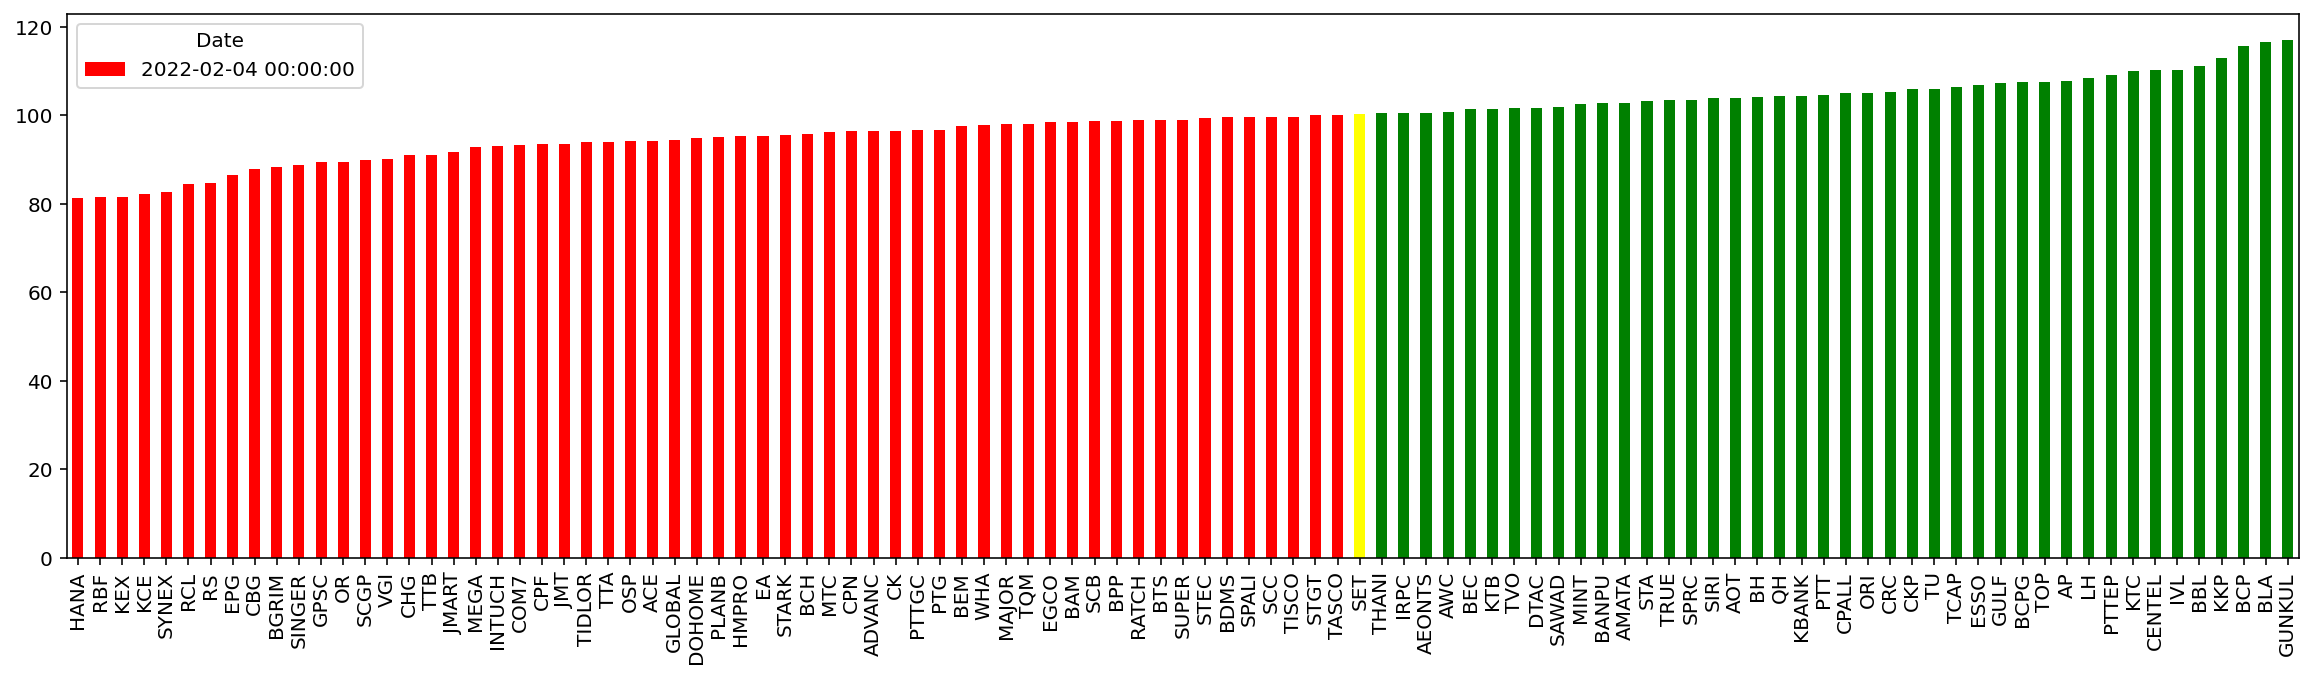

In [199]:
color = []
setvalue = k[k.index=='SET'].values[0][0]
for i in k.index:
    m = k[k.index==i].values[0][0]
    if(m>setvalue):
        color.append('green')
    elif(m<setvalue):
        color.append('red')
    else:
        color.append('yellow')
    
k.plot(kind='bar',figsize=(20,5),color=[color])